## <span style='color:deepskyblue'>Magnet Down File</span>

In [ ]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

In [ ]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
import wget
#url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
#download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

mkdir: LHCb_Data: File exists


In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

file_name_key = "Down"

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

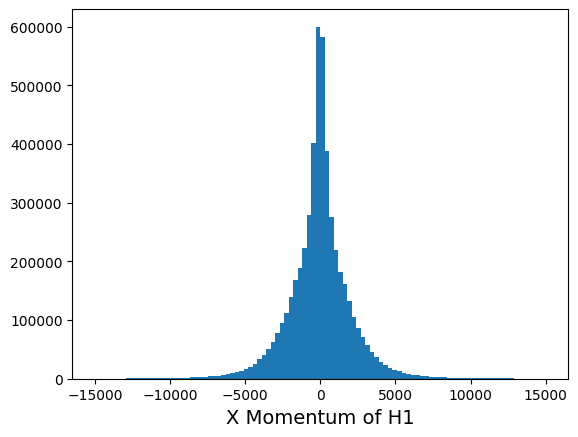

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

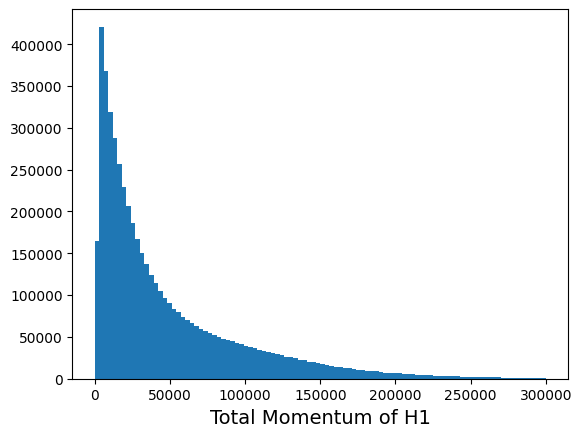

In [10]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2) # MeV/c^2

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,300000));
plt.xlabel('Total Momentum of H1', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Text(0.5, 0, 'Total Momentum B')

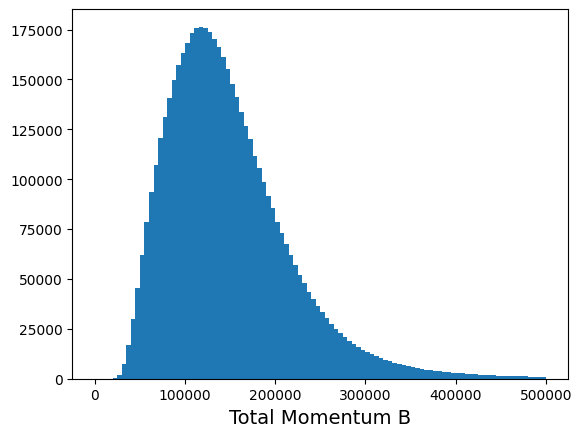

In [11]:
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()

H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

# H1,H2,H3 Total momentum
H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2) # MeV/c^2
H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2) # MeV/c^2
H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2) # MeV/c^2

#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

B_Ptot= H1_Ptot + H2_Ptot + H3_Ptot # MeV/c^2

plt.figure()
plt.hist (B_Ptot, bins=100, range=(0,500000))
plt.xlabel('Total Momentum B', fontsize=14)


So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")

for branch, value in branches_dictionary[45].items():
    print (f"{branch}: {value}")


Event number #45
-------------------
B_FlightDistance: 257.00205776946603
B_VertexChi2: 1.865567179221614
H1_PX: 420.3413896413646
H1_PY: -110.66276079201207
H1_PZ: 5883.766388082404
H1_ProbK: 0.012183159589767456
H1_ProbPi: 0.8191394209861755
H1_Charge: -1
H1_IPChi2: 27121.53690741779
H1_isMuon: 1
H2_PX: -985.6367588987478
H2_PY: 630.9893539299605
H2_PZ: 35342.13861801284
H2_ProbK: 0.6670113801956177
H2_ProbPi: 0.04563945531845093
H2_Charge: 1
H2_IPChi2: 13712.438218214942
H2_isMuon: 0
H3_PX: -6242.300384410311
H3_PY: -862.2130979651508
H3_PZ: 277275.49225626234
H3_ProbK: 0.07501816749572754
H3_ProbPi: 0.428352952003479
H3_Charge: 1
H3_IPChi2: 1026.12298434195
H3_isMuon: 0


In [13]:
print(type(branches_dictionary))
print(type(branches_dictionary[45].items()))

<class 'list'>
<class 'dict_items'>


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

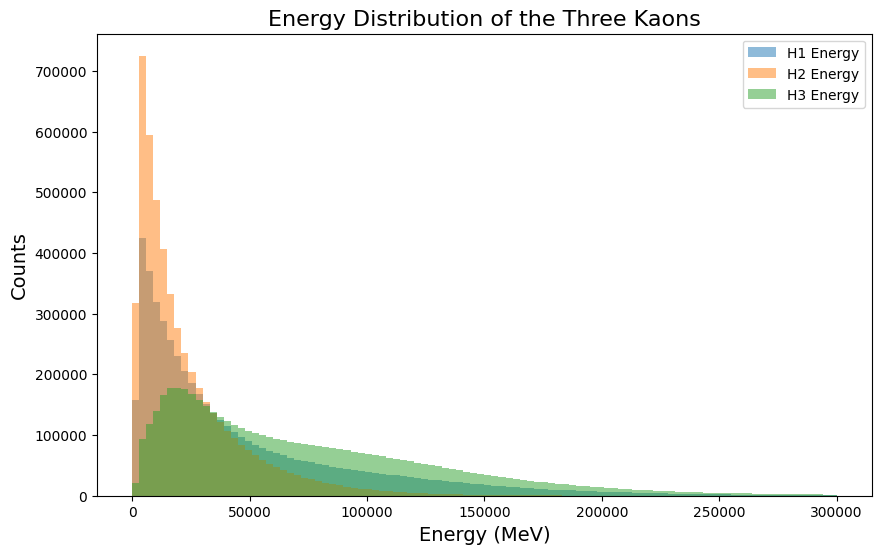

In [14]:
#do the maths here.

# Mass of a Kaon
m_K = 493.677 # MeV/c^2

# Calculate the energy for each Kaon using the relativistic energy-momentum relation
H1_Energy = np.sqrt(H1_Ptot**2 + m_K**2) # MeV/c^2
H2_Energy = np.sqrt(H2_Ptot**2 + m_K**2) # MeV/c^2
H3_Energy = np.sqrt(H3_Ptot**2 + m_K**2) # MeV/c^2

# Plot the energies of the three Kaons
plt.figure(figsize=(10, 6))
plt.hist(H1_Energy, bins=100, range=(0, 300000), alpha=0.5, label='H1 Energy')
plt.hist(H2_Energy, bins=100, range=(0, 300000), alpha=0.5, label='H2 Energy')
plt.hist(H3_Energy, bins=100, range=(0, 300000), alpha=0.5, label='H3 Energy')
plt.xlabel('Energy (MeV)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.title('Energy Distribution of the Three Kaons', fontsize=16)
plt.show()

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

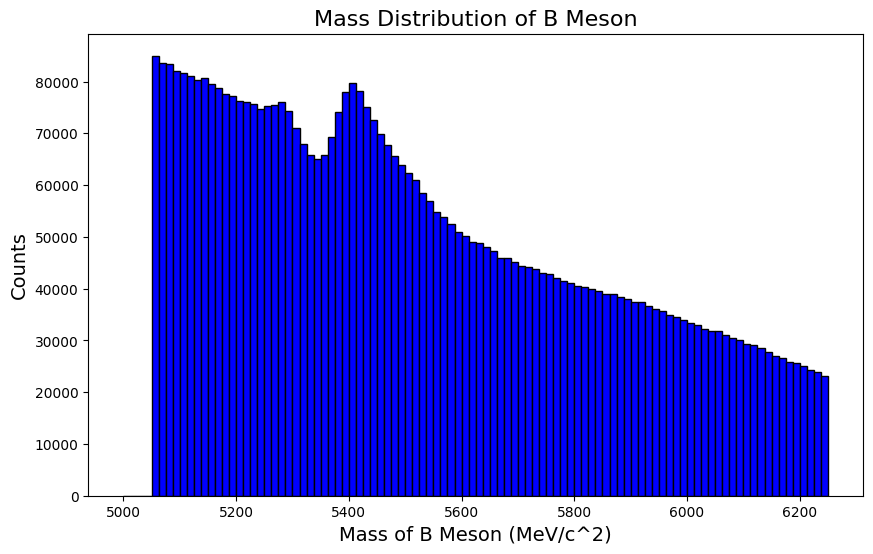

In [15]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters

# Calculate the total mass of the B meson
B_Mass = np.sqrt((H1_Energy + H2_Energy + H3_Energy)**2 - (H1_PX + H2_PX + H3_PX)**2 - (H1_PY + H2_PY + H3_PY)**2 - (H1_PZ + H2_PZ + H3_PZ)**2)

#Now plot a histogram of the range of masses of the B meson.
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=100, range=(5000, 6250), color='blue', edgecolor='black')
plt.xlabel('Mass of B Meson (MeV/c^2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Mass Distribution of B Meson', fontsize=16)
plt.show()

#Does this match what we would expect from theory?

#   Loof good to me :)

#Hint - look it up

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

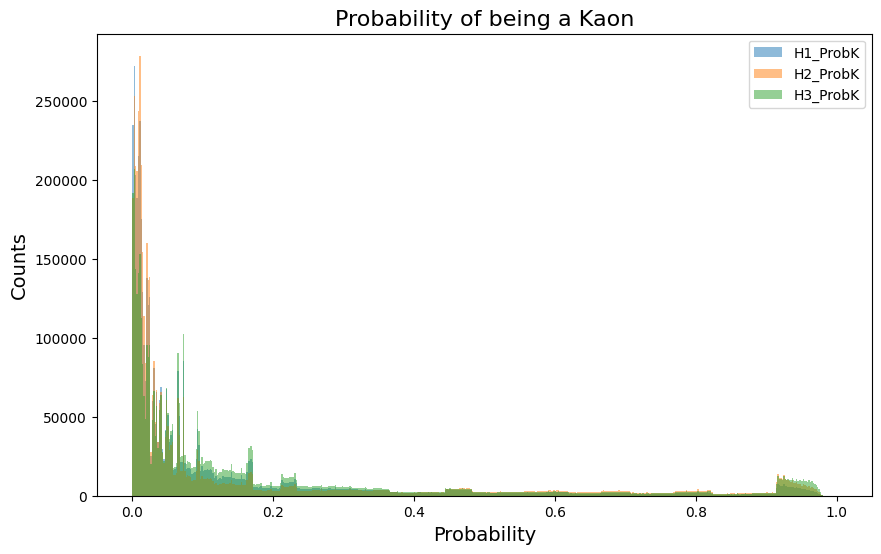

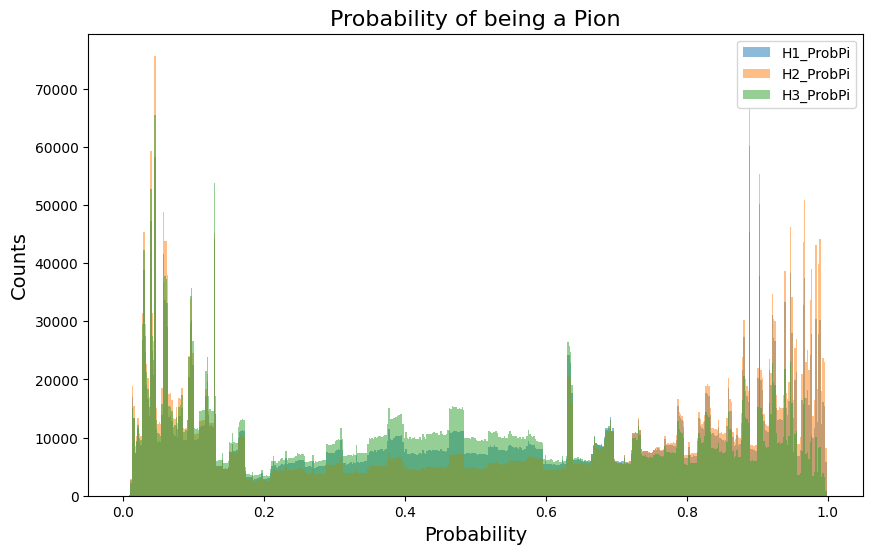

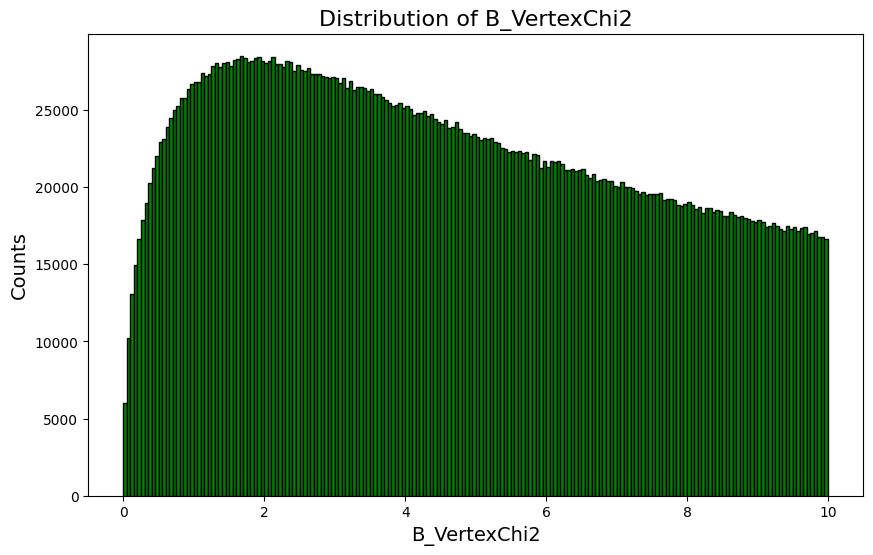

In [16]:
#Make plots of H1/H2/H3 _ProbK on one plot
H1_ProbK = Events['H1_ProbK'].array()
H2_ProbK = Events['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array()

plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H1_ProbK')
plt.hist(H2_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbK')
plt.hist(H3_ProbK, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbK')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.title('Probability of being a Kaon', fontsize=16)
plt.show()

#Make plots of H1/H2/H3 _ProbPi on one plot
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()

plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H1_ProbPi')
plt.hist(H2_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=500, range=(0, 1), alpha=0.5, label='H3_ProbPi')
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()
plt.title('Probability of being a Pion', fontsize=16)
plt.show()

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = Events['B_VertexChi2'].array()

# Plot the B_VertexChi2
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=200, range=(0, 10), color='green', edgecolor='black')
plt.xlabel('B_VertexChi2', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Distribution of B_VertexChi2', fontsize=16)
plt.show()

# Plot any other variables from the list above you think would be handy to use in a selection...
## For later


Using these plots, we can now think about making a preselection. This has some format like the below:

In [ ]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90 and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.

# Define a new selection criteria
"""
     Selection criteria:
     - H_ProbK > H_ProbPi
     - H_isMuon == 0
"""

selection = ( (branches['H1_ProbK'] > branches['H1_ProbPi']) & (branches['H2_ProbK'] > branches['H2_ProbPi']) & (branches['H3_ProbK'] > branches['H3_ProbPi']) ) \
     & ( (branches['H1_isMuon'] == 0) & (branches['H2_isMuon'] == 0) & (branches['H3_isMuon'] == 0) )


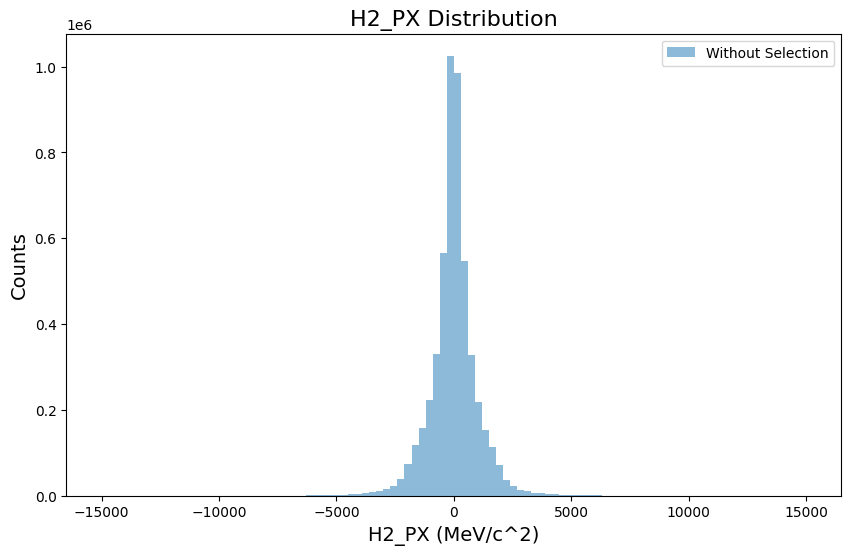

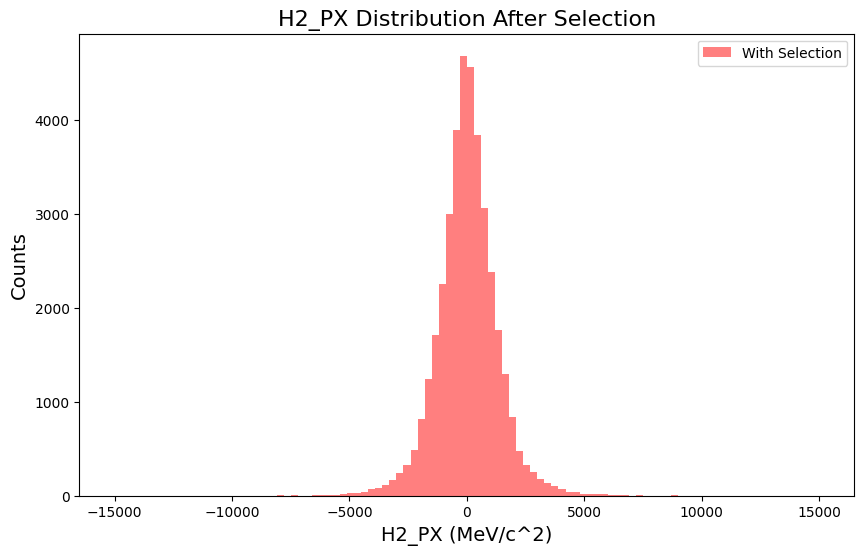

In [251]:
#To apply the selection - we can use the selection command after our instruction e.g.:
#CutTree = branches['H2_PX'][selection]

#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

#Try plotting our H2_PX distribution with and without the selection and spot the differences...

# Plot H2_PX distribution without selection
plt.figure(figsize=(10, 6))
plt.hist(branches['H2_PX'], bins=100, range=(-15000, 15000), alpha=0.5, label='Without Selection')
plt.xlabel('H2_PX (MeV/c^2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('H2_PX Distribution', fontsize=16)
plt.legend()
plt.show()

# Apply the selection
CutTree_H2_PX = branches['H2_PX'][selection]

# Plot H2_PX distribution with selection
plt.figure(figsize=(10, 6))
plt.hist(CutTree_H2_PX, bins=100, range=(-15000, 15000), alpha=0.5, label='With Selection', color='red')
plt.xlabel('H2_PX (MeV/c^2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('H2_PX Distribution After Selection', fontsize=16)
plt.legend()
plt.show()

- Number of entries was siginigicantly reduced (From $> 10^{6}$ to $> 1000$ entries)


In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

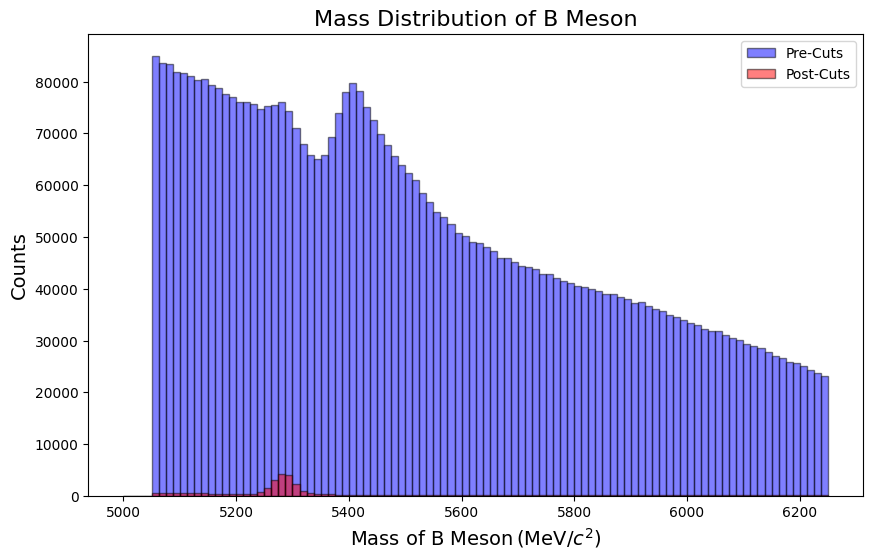

Number of entries pre-cuts: 5135823
Number of entries post-cuts: 38744


In [ ]:
# Calculate the total mass of the B meson for pre-cuts
B_Mass_pre = np.sqrt((H1_Energy + H2_Energy + H3_Energy)**2 - (H1_PX + H2_PX + H3_PX)**2 - (H1_PY + H2_PY + H3_PY)**2 - (H1_PZ + H2_PZ + H3_PZ)**2)

# Apply the selection to calculate the total mass of the B meson for post-cuts
H1_Energy_cut = H1_Energy[selection]
H2_Energy_cut = H2_Energy[selection]
H3_Energy_cut = H3_Energy[selection]

#H_PX
H1_PX_cut = H1_PX[selection]
H2_PX_cut = H2_PX[selection]
H3_PX_cut = H3_PX[selection]
#H_PY
H1_PY_cut = H1_PY[selection]
H2_PY_cut = H2_PY[selection]
H3_PY_cut = H3_PY[selection]
#H_PZ
H1_PZ_cut = H1_PZ[selection]
H2_PZ_cut = H2_PZ[selection]
H3_PZ_cut = H3_PZ[selection]

# Calculate the total mass of the B meson for post-cuts
B_Mass_post = np.sqrt((H1_Energy_cut + H2_Energy_cut + H3_Energy_cut)**2 - (H1_PX_cut + H2_PX_cut + H3_PX_cut)**2 - (H1_PY_cut + H2_PY_cut + H3_PY_cut)**2 - (H1_PZ_cut + H2_PZ_cut + H3_PZ_cut)**2)

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(B_Mass_pre, bins=100, range=(5000, 6250), alpha=0.5, label='Pre-Cuts', color='blue', edgecolor='black')
plt.hist(B_Mass_post, bins=100, range=(5000, 6250), alpha=0.5, label='Post-Cuts', color='red', edgecolor='black')
plt.xlabel(r"$\text{Mass of B Meson} \, (\text{MeV}/c^2)$", fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Mass Distribution of B Meson', fontsize=16)
plt.legend()
plt.show()

# Print the number of entries in each
print(f"Number of entries pre-cuts: {len(B_Mass_pre)}")
print(f"Number of entries post-cuts: {len(B_Mass_post)}")

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.


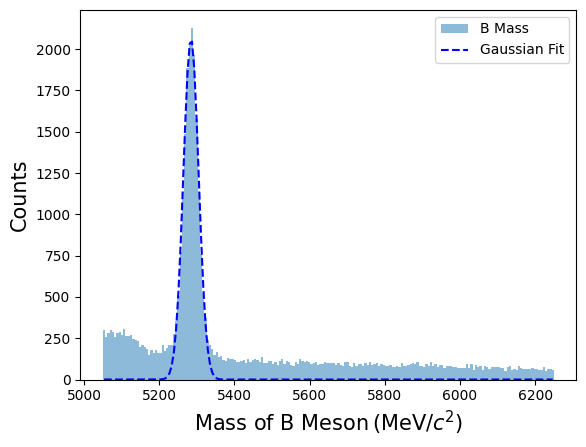

In [337]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = B_Mass_post  # Post-selection B_Mass

# we make a plot (plt.hist) and then we extract the bin height and its edges from the plot...
bin_height, bin_edge, _ = plt.hist(B_Mass, bins=200, range=(5050, 6250), label="B Mass", alpha = 0.5)

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2  # Use the center of the bins for x_data
y_data = bin_height

# Create a Gauss function for fitting - nothing needs changing here
def gauss(x, *p):
    A, mu, sigma = p
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

# Get the fitted curve - some things need changing here
initial_parameters = [max(y_data), np.mean(B_Mass), np.std(B_Mass)]  # Initial guess for the parameters
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=initial_parameters)

y_fit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well
plt.plot(x_data, y_fit, label='Gaussian Fit', linestyle='--', color='blue')
plt.xlabel(r"$\text{Mass of B Meson} \, (\text{MeV}/c^2)$", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.legend()
plt.show()


In [338]:
# Explore optimisedParameters - what does it contain? 
    # Optimized A, mu, sigma from the gauss function

print("Optimised Parameters:")
print(f"A (Gaussian Amplitude): {optimisedParameters[0]}")
print(f"mu (Gaussian Mean): {optimisedParameters[1]}")
print(f"sigma (Gaussian Std Dev): {optimisedParameters[2]}")

# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

Optimised Parameters:
A (Gaussian Amplitude): 2062.05956595561
mu (Gaussian Mean): 5284.329500221053
sigma (Gaussian Std Dev): 20.278578058589133


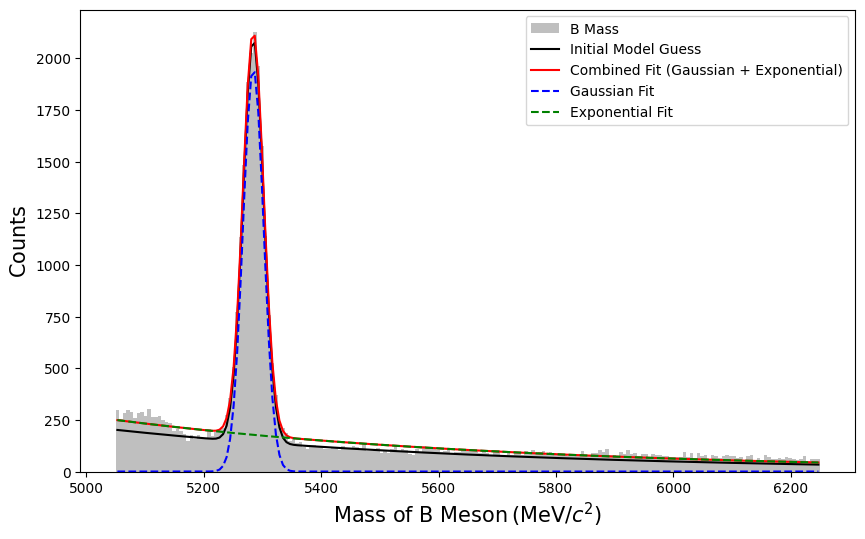

Optimised Parameters for Combined Model:
- A (Gaussian Amplitude):          1952.5794 ± 12.8148
- mu (Gaussian Mean):              5284.5030 ± 0.1323
- sigma (Gaussian Std Dev):        17.6134 ± 0.1361
- B (Exponential Amplitude):       393908.5001 ± 101329.8229
- lambda (Exponential Decay Rate): 0.0015 ± 0.0000


In [276]:
#================================================================================================
# Gauss and exponential fitting
#================================================================================================

# Define the Gaussian function
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

# Define the exponential function
def exp(x, B, lam):
    return B * np.exp(-lam * x)

# Define the combined model
def combined_model(x, A, mu, sigma, B, lam):
    return (gauss(x, A, mu, sigma) + exp(x, B, lam)) # Gaussian distribution + exponential distribution

# Initial guess for the parameters
                              # A,         mu,        Sigma,   B,           Lambda
initial_parameters_combined = [ 1952.5793, 5284.5030, 17.6134, 393924.2395, 0.0015 ] #Random initial guesses for the parameters after second iteration of code


# Fit the combined model to the data
optimisedParameters_combined, pcov_combined = curve_fit(combined_model, x_data, y_data, p0=initial_parameters_combined)

# Extract the fitted parameters
A_fit, mu_fit, sigma_fit, B_fit, lam_fit = optimisedParameters_combined

# Extract the errors in the fitted parameters
sigma_A, sigma_mu, sigma_sigma, sigma_B, sigma_lam = np.sqrt(np.diag(pcov_combined)) # Standard deviations are the square root of the diagonal elements of the covariance matrix

# Generate the fitted curves 
y_fit_inital_guess = combined_model(x_data, *initial_parameters_combined)
y_fit_combined = combined_model(x_data, A_fit, mu_fit, sigma_fit, B_fit, lam_fit)
y_fit_gauss = gauss(x_data, A_fit, mu_fit, sigma_fit)
y_fit_exp = exp(x_data, B_fit, lam_fit)

# Histogram properties
min_val = 5050
max_val = 6250
nbins = 200
bin_width = (max_val - min_val) / nbins

# Calculate the Gaussian yield
gaussian_yield = (A_fit * sigma_fit * np.sqrt(2 * np.pi)) / (bin_width) # Gaussian yield by integrating the Gaussian function
gaussian_yield_error = gaussian_yield * np.sqrt((sigma_A / A_fit) ** 2 + (sigma_sigma / sigma_fit) ** 2)

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.hist(B_Mass, bins=nbins, range=(min_val, max_val), label="B Mass", alpha=0.5, color='gray')
plt.plot(x_data, y_fit_inital_guess, label='Initial Model Guess', color='black')             # Initial guess
plt.plot(x_data, y_fit_combined, label='Combined Fit (Gaussian + Exponential)', color='red') # Combined model
plt.plot(x_data, y_fit_gauss, label='Gaussian Fit', linestyle='--', color='blue')            # Gaussian model
plt.plot(x_data, y_fit_exp, label='Exponential Fit', linestyle='--', color='green')          # Exponential model
plt.xlabel(r"$\text{Mass of B Meson} \, (\text{MeV}/c^2)$", fontsize=15)
plt.ylabel(r"$\text{Counts}$", fontsize=15)
plt.legend()
plt.show()

# Print the optimised parameters
print("\033[0;34;1mOptimised Parameters for Combined Model:\033[0m")
print(f"- \033[1mA (Gaussian Amplitude):\033[0m          {A_fit:.4f} ± {sigma_A:.4f}")
print(f"- \033[1mmu (Gaussian Mean):\033[0m              {mu_fit:.4f} ± {sigma_mu:.4f}")
print(f"- \033[1msigma (Gaussian Std Dev):\033[0m        {sigma_fit:.4f} ± {sigma_sigma:.4f}")
print(f"- \033[1mB (Exponential Amplitude):\033[0m       {B_fit:.4f} ± {sigma_B:.4f}")
print(f"- \033[1mlambda (Exponential Decay Rate):\033[0m {lam_fit:.4f} ± {sigma_lam:.4f}")

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [277]:
# Print the Gaussian yield and the number of entries in the Exponential background
print(f"\n\033[1mTotal number of entries: {len(B_Mass)}\033[0m")
print(f"- \033[1mNumber of entries in the Gaussian peak (Gaussian yield):\033[0m {gaussian_yield:.0f} ± {gaussian_yield_error:.0f}")  
print(f"- \033[1mNumber of entries in the Exponential background:\033[0m {np.sum(y_fit_exp):.0f} ± {np.sqrt(np.sum(y_fit_exp)):.0f}") # Poisson error
print(f"- \033[1mNumber of entries in the Combined Fit:\033[0m {np.sum(y_fit_combined):.0f} ± {np.sqrt(np.sum(y_fit_combined)):.0f}") # Poisson error


Total number of entries: 38744
- Number of entries in the Gaussian peak (Gaussian yield): 14368 ± 146
- Number of entries in the Exponential background: 23602 ± 154
- Number of entries in the Combined Fit: 37970 ± 195


In [278]:
# Calculate the chi-square value
chi_square = np.sum(((y_data - y_fit_combined) ** 2) / y_data)
degrees_of_freedom = len(y_data) - len(optimisedParameters_combined)
chi_square_reduced = chi_square / degrees_of_freedom

print(f"Combined Model χ²: {chi_square:.4f}")
print(f"\033[1mCombined Model Reduced χ²/ν: \033[0;34;1m{chi_square_reduced:.4f} \033[0m")

Combined Model χ²: 792.4195
Combined Model Reduced χ²/ν: 4.0637 


- *The current model generated captures some trends in the data but is not an optimal fit since the obtained chi-square value was ~ 4.0*
- *A total of 14368 from the 38744 events are inside the Gaussian model*

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [363]:
#================================================================================================
# Matter-Antimatter Counting 
#================================================================================================

# Extract the charge information for H1, H2, and H3
H1_Charge = Events['H1_Charge'].array()
H2_Charge = Events['H2_Charge'].array()
H3_Charge = Events['H3_Charge'].array()

# Calculate the total charge for each event
total_charge = H1_Charge + H2_Charge + H3_Charge

# Apply the selection criteria
B_plus_selection = (total_charge == 1)  # B+ meson
B_minus_selection = (total_charge == -1)  # B- meson

# Apply the pre-selection to the B+ and B- selections
B_plus_selection = B_plus_selection & selection
B_minus_selection = B_minus_selection & selection

# Calculate the number of B+ and B- events
N_B_plus = np.sum(B_plus_selection)
N_B_minus = np.sum(B_minus_selection)

# Print the results
print(f"Number of B+ events: {N_B_plus}")
print(f"Number of B- events: {N_B_minus}")
print(f"Sum of B+ and B- is {N_B_plus+N_B_minus}")

# Calculate the asymmetry
A = (N_B_minus - N_B_plus) / (N_B_minus + N_B_plus)
sigma_A = np.sqrt((1 - A**2) / (N_B_minus + N_B_plus))

# Print the asymmetry and its uncertainty
print(f"\033[0;34;1mAsymmetry (A): {A:.6f} ± {sigma_A:.6f}\033[0m")

if N_B_plus < N_B_minus:
    print("\033[0;34;1mMatter is prefered\033[0m")
else:
    print("\033[0;31;1mAntimatter is prefered\033[0m")


Number of B+ events: 20213
Number of B- events: 18531
Sum of B+ and B- is 38744
Asymmetry (A): -0.043413 ± 0.005076
Antimatter is prefered


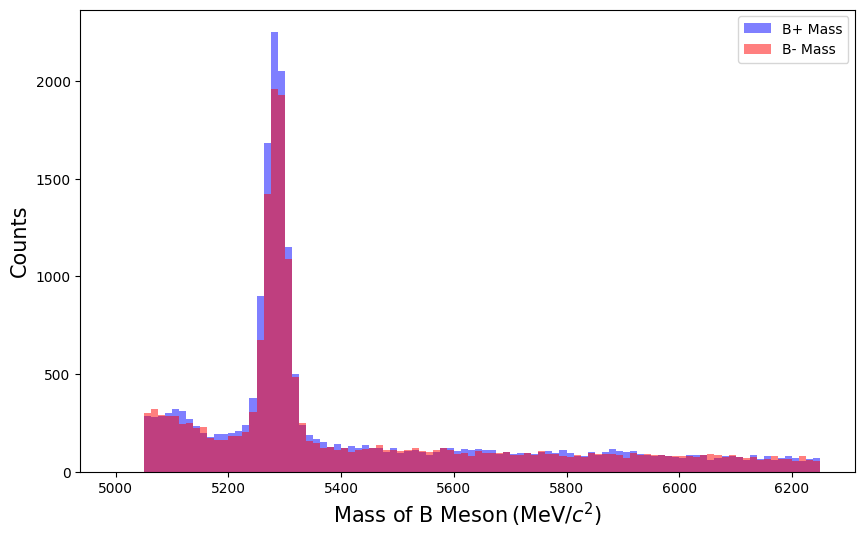

Number of B+ events: 20213
Number of B- events: 18531


In [364]:
#================================================================================================
# B+ and B- Meson Mass Distribution
#================================================================================================

# Selection criteria for B+ and B- mesons
selection = ( (branches['H1_ProbK'] > branches['H1_ProbPi']) & (branches['H2_ProbK'] > branches['H2_ProbPi']) & (branches['H3_ProbK'] > branches['H3_ProbPi']) ) \
     & ( (branches['H1_isMuon'] == 0) & (branches['H2_isMuon'] == 0) & (branches['H3_isMuon'] == 0) )

# Calculate the total charge for each event
total_charge = branches['H1_Charge'] + branches['H2_Charge'] + branches['H3_Charge']

# Apply the selection criteria combined with charge selection
selection_positive = selection & (total_charge == 1) # B+ mesons
selection_negative = selection & (total_charge == -1) # B- mesons

# Positive B mesons
H1_Energy_cut_plus = H1_Energy[selection_positive]
H2_Energy_cut_plus = H2_Energy[selection_positive]
H3_Energy_cut_plus = H3_Energy[selection_positive]
H1_PX_cut_plus = H1_PX[selection_positive]
H2_PX_cut_plus = H2_PX[selection_positive]
H3_PX_cut_plus = H3_PX[selection_positive]
H1_PY_cut_plus = H1_PY[selection_positive]
H2_PY_cut_plus = H2_PY[selection_positive]
H3_PY_cut_plus = H3_PY[selection_positive]
H1_PZ_cut_plus = H1_PZ[selection_positive]
H2_PZ_cut_plus = H2_PZ[selection_positive]
H3_PZ_cut_plus = H3_PZ[selection_positive]

B_Mass_post_positive = np.sqrt((H1_Energy_cut_plus + H2_Energy_cut_plus + H3_Energy_cut_plus)**2 - (H1_PX_cut_plus + H2_PX_cut_plus + H3_PX_cut_plus)**2 - (H1_PY_cut_plus + H2_PY_cut_plus + H3_PY_cut_plus)**2 - (H1_PZ_cut_plus + H2_PZ_cut_plus + H3_PZ_cut_plus)**2)

# Negative B mesons
H1_Energy_cut_minus = H1_Energy[selection_negative]
H2_Energy_cut_minus = H2_Energy[selection_negative]
H3_Energy_cut_minus = H3_Energy[selection_negative]
H1_PX_cut_minus = H1_PX[selection_negative]
H2_PX_cut_minus = H2_PX[selection_negative]
H3_PX_cut_minus = H3_PX[selection_negative]
H1_PY_cut_minus = H1_PY[selection_negative]
H2_PY_cut_minus = H2_PY[selection_negative]
H3_PY_cut_minus = H3_PY[selection_negative]
H1_PZ_cut_minus = H1_PZ[selection_negative]
H2_PZ_cut_minus = H2_PZ[selection_negative]
H3_PZ_cut_minus = H3_PZ[selection_negative]

B_Mass_post_negative = np.sqrt((H1_Energy_cut_minus + H2_Energy_cut_minus + H3_Energy_cut_minus)**2 - (H1_PX_cut_minus + H2_PX_cut_minus + H3_PX_cut_minus)**2 - (H1_PY_cut_minus + H2_PY_cut_minus + H3_PY_cut_minus)**2 - (H1_PZ_cut_minus + H2_PZ_cut_minus + H3_PZ_cut_minus)**2)

# Plot the mass of the B meson for B+ and B- mesons
plt.figure(figsize=(10, 6))
plt.hist(B_Mass_post_positive, bins=100, range=(5000, 6250), label="B+ Mass", alpha=0.5, color='blue')
plt.hist(B_Mass_post_negative, bins=100, range=(5000, 6250), label="B- Mass", alpha=0.5, color='red')
plt.xlabel(r"$\text{Mass of B Meson} \, (\text{MeV}/c^2)$", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.legend()
plt.show()

print(f"Number of B+ events: {len(B_Mass_post_positive)}")
print(f"Number of B- events: {len(B_Mass_post_negative)}")

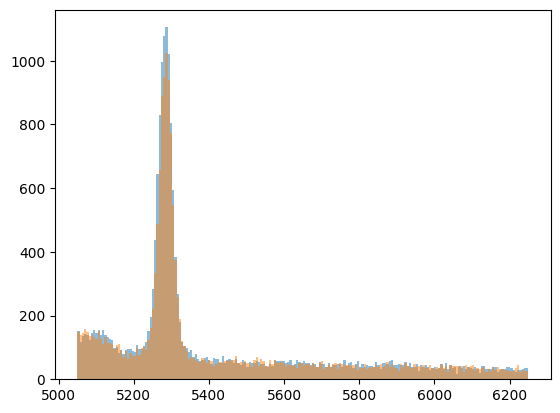

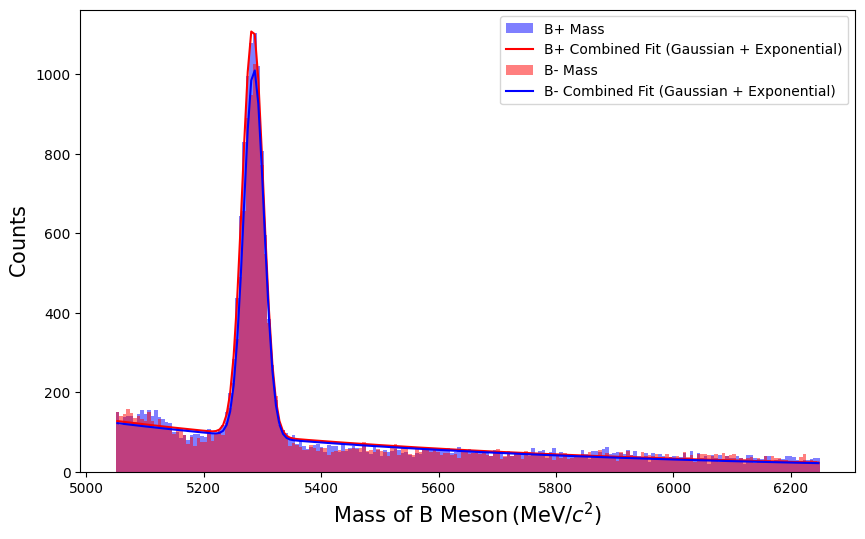

Optimised Parameters for B+ Mesons:
- A (Gaussian Amplitude):          1027.8254 ± 6.9274
- mu (Gaussian Mean):              5283.6844 ± 0.1383
- sigma (Gaussian Std Dev):        17.9381 ± 0.1424
- B (Exponential Amplitude):       189628.5738 ± 51846.6874
- lambda (Exponential Decay Rate): 0.0014 ± 0.0001
- Number of entries in the Gaussian peak (Gaussian yield): 7396 ± 77
Optimised Parameters for B- Mesons:
- A (Gaussian Amplitude):          927.4258 ± 7.3203
- mu (Gaussian Mean):              5285.3888 ± 0.1554
- sigma (Gaussian Std Dev):        17.2087 ± 0.1598
- B (Exponential Amplitude):       204285.0462 ± 61071.1013
- lambda (Exponential Decay Rate): 0.0015 ± 0.0001
- Number of entries in the Gaussian peak (Gaussian yield): 6402 ± 78


In [365]:
#================================================================================================
# Gauss and exponential fitting for B+ and B- mesons
#================================================================================================

def plot(B_Mass, key):
    # Histogram properties
    min_val = min(B_Mass)
    max_val = max(B_Mass)
    nbins = 200
    bin_width = (max_val - min_val) / nbins

    # Create histogram and extract bin heights and edges
    bin_height, bin_edge, _ = plt.hist(B_Mass, bins=200, range=(5050, 6250), label=("B"+key+" Mass"), alpha=0.5)
    
    # Convert bin edges to bin centers for fitting
    x_data = (bin_edge[:-1] + bin_edge[1:]) / 2  # Use the center of the bins for x_data
    y_data = bin_height

    # Initial guess for the parameters
    initial_parameters_combined = [3000, 5300, 17, 205000, 0.0015]  # Random initial guesses for the parameters

    # Fit the combined model (Gaussian + Exponential) to the data
    optimisedParameters_combined, pcov_combined = curve_fit(combined_model, x_data, y_data, p0=initial_parameters_combined)

    # Extract the fitted parameters
    A_fit, mu_fit, sigma_fit, B_fit, lam_fit = optimisedParameters_combined

    # Extract the errors in the fitted parameters
    sigma_A, sigma_mu, sigma_sigma, sigma_B, sigma_lam = np.sqrt(np.diag(pcov_combined))  # Standard deviations are the square root of the diagonal elements of the covariance matrix

    # Generate the fitted curves 
    y_fit_combined = combined_model(x_data, A_fit, mu_fit, sigma_fit, B_fit, lam_fit)
    y_fit_gauss = gauss(x_data, A_fit, mu_fit, sigma_fit)
    y_fit_exp = exp(x_data, B_fit, lam_fit)

    # Calculate the Gaussian yield
    gaussian_yield = (A_fit * sigma_fit * np.sqrt(2 * np.pi)) / bin_width  # Gaussian yield by integrating the Gaussian function
    gaussian_yield_error = gaussian_yield * np.sqrt((sigma_A / A_fit) ** 2 + (sigma_sigma / sigma_fit) ** 2)

    # Return the necessary data for plotting and analysis
    return_list = [A_fit, mu_fit, sigma_fit, B_fit, lam_fit, sigma_A, sigma_mu, sigma_sigma, sigma_B, sigma_lam, gaussian_yield, gaussian_yield_error]

    return x_data, y_data, y_fit_combined, y_fit_gauss, y_fit_exp, return_list


x_data_plus, y_data_plus, y_fit_combined_plus, y_fit_gauss_plus, y_fit_exp_plus, return_list_plus = plot(B_Mass_post_positive, "+")
x_data_minus, y_data_minus, y_fit_combined_minus, y_fit_gauss_minus, y_fit_exp_minus, return_list_minus = plot(B_Mass_post_negative, "-")

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.hist(B_Mass_post_positive, bins=200, range=(5050, 6250), label="B+ Mass", alpha=0.5, color='blue') 
plt.plot(x_data_plus, y_fit_combined_plus, label='B+ Combined Fit (Gaussian + Exponential)', color='red') # Combined model
plt.hist(B_Mass_post_negative, bins=200, range=(5050, 6250), label="B- Mass", alpha=0.5, color='red')
plt.plot(x_data_minus, y_fit_combined_minus, label='B- Combined Fit (Gaussian + Exponential)', color='blue') # Combined model
plt.xlabel(r"$\text{Mass of B Meson} \, (\text{MeV}/c^2)$", fontsize=15)
plt.ylabel(r"$\text{Counts}$", fontsize=15)
plt.legend()
plt.show()

# Print the optimised parameters
print("\033[0;34;1mOptimised Parameters for B+ Mesons:\033[0m")
print(f"- \033[1mA (Gaussian Amplitude):\033[0m          {return_list_plus[0]:.4f} ± {return_list_plus[5]:.4f}")
print(f"- \033[1mmu (Gaussian Mean):\033[0m              {return_list_plus[1]:.4f} ± {return_list_plus[6]:.4f}")
print(f"- \033[1msigma (Gaussian Std Dev):\033[0m        {return_list_plus[2]:.4f} ± {return_list_plus[7]:.4f}")
print(f"- \033[1mB (Exponential Amplitude):\033[0m       {return_list_plus[3]:.4f} ± {return_list_plus[8]:.4f}")
print(f"- \033[1mlambda (Exponential Decay Rate):\033[0m {return_list_plus[4]:.4f} ± {return_list_plus[9]:.4f}")
print(f"- \033[1mNumber of entries in the Gaussian peak (Gaussian yield):\033[0m {return_list_plus[10]:.0f} ± {return_list_plus[11]:.0f}")

print("\033[0;34;1mOptimised Parameters for B- Mesons:\033[0m")
print(f"- \033[1mA (Gaussian Amplitude):\033[0m          {return_list_minus[0]:.4f} ± {return_list_minus[5]:.4f}")
print(f"- \033[1mmu (Gaussian Mean):\033[0m              {return_list_minus[1]:.4f} ± {return_list_minus[6]:.4f}")
print(f"- \033[1msigma (Gaussian Std Dev):\033[0m        {return_list_minus[2]:.4f} ± {return_list_minus[7]:.4f}")
print(f"- \033[1mB (Exponential Amplitude):\033[0m       {return_list_minus[3]:.4f} ± {return_list_minus[8]:.4f}")
print(f"- \033[1mlambda (Exponential Decay Rate):\033[0m {return_list_minus[4]:.4f} ± {return_list_minus[9]:.4f}")
print(f"- \033[1mNumber of entries in the Gaussian peak (Gaussian yield):\033[0m {return_list_minus[10]:.0f} ± {return_list_minus[11]:.0f}")


## <span style='color:deepskyblue'>Conclusion</span>

Asymmetry (A) in **Magnet Up** File: -0.033880 ± 0.006201 (See Up file)
Asymmetry (A) in **Magnet Down** File: -0.043413 ± 0.005076

Both files show an asymmetry in which **Antimatter** is prefered, regardles of the magnet orientation.

In [367]:
from scipy.stats import norm

# Given values
A1 = -0.033880  # Asymmetry with magnet up
sigma1 = 0.006201  # Uncertainty for A1
A2 = -0.043413  # Asymmetry with magnet up
sigma2 = 0.005076  # Uncertainty for A2

# Compute Z-score
Z = abs(A1 - A2) / np.sqrt(sigma1**2 + sigma2**2)

# Compute p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(Z)))

# Compute relative percentage difference
relative_difference = (abs(A1 - A2) / ((abs(A1) + abs(A2)) / 2)) * 100

# Print results
print(f"Z-score: {Z:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Relative percentage difference: {relative_difference:.2f}%")

# Conclusion based on statistical significance
if p_value < 0.05:
    print("The difference is statistically significant (p < 0.05).")
else:
    print("The difference is NOT statistically significant (p > 0.05).")

Z-score: 1.19
P-value: 0.234
Relative percentage difference: 24.67%
The difference is NOT statistically significant (p > 0.05).


# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)